An attempt to implement the method for estimating fitness distribution from chapter 6.So far looks like it does not work correctly. Estimated distribution is far from uniform

In [10]:
import model

In [11]:
network = model.network()
network.generate_network(1000)

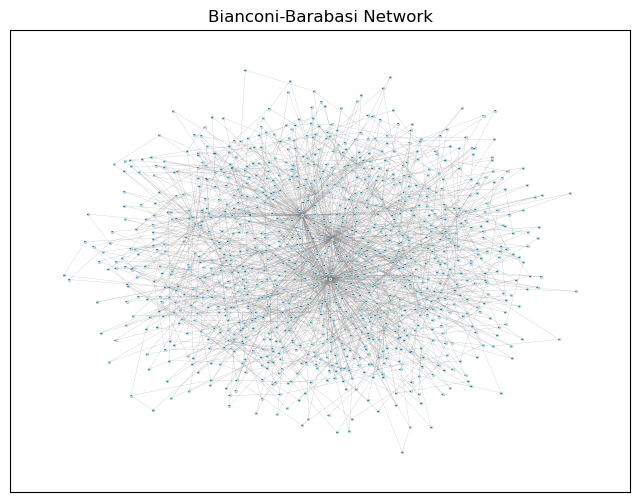

Text(0.5, 1.0, 'Fitness Distribution')

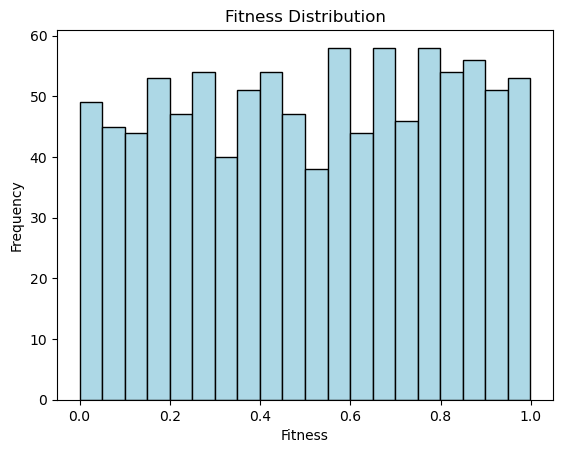

In [12]:
import networkx as nx
import matplotlib.pyplot as plt


data = network.graph

# 1. Draw the network
G = nx.Graph()
for node, (connections, _) in data.items():
    G.add_edges_from((node, neighbor) for neighbor in connections)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=2, font_size=1, node_color='lightblue', edge_color='gray', width=0.1)
plt.title("Bianconi-Barabasi Network")
plt.show()

# 2. Extract fitness values
fitness_values = [fitness for _, (_, fitness) in data.items()]

# 3. Create a new dict without fitness values
new_data = {node: connections for node, (connections, _) in data.items()}

# 4. Plot the fitness distribution
plt.hist(fitness_values, bins=20, color='lightblue', edgecolor='black')
plt.xlabel("Fitness")
plt.ylabel("Frequency")
plt.title("Fitness Distribution")


(0.0, 100.0)

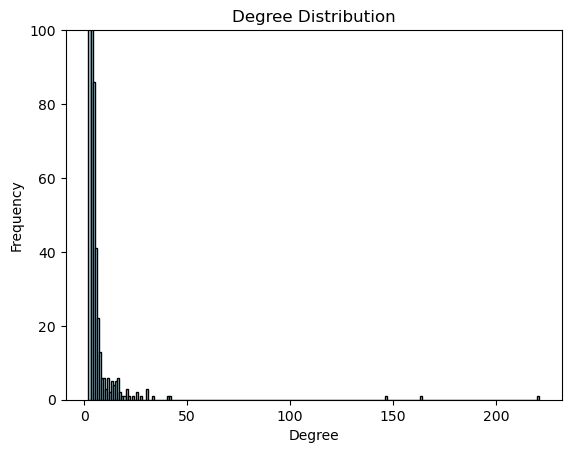

In [15]:
# just plot of degree distribution

degrees = [degree for _, degree in G.degree()]
degree_counts = dict(nx.degree(G))

plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2, 1), color='lightblue', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.ylim(0, 100)

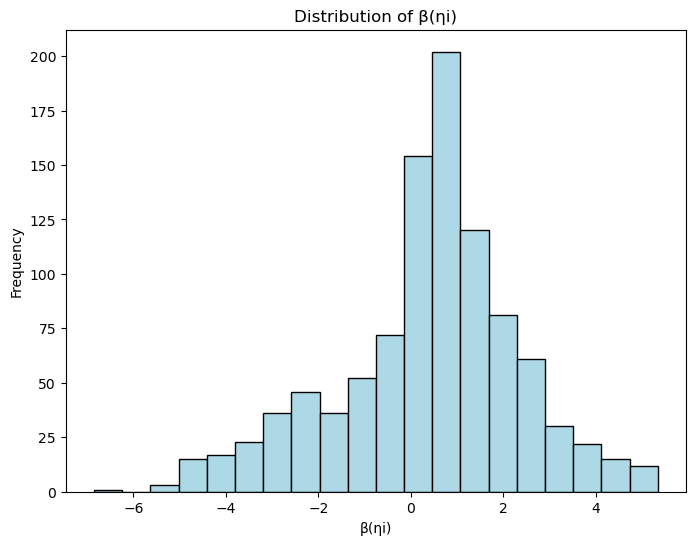

In [16]:
# supposed to estimate fitness

import numpy as np

data = network.graph
from scipy.stats import linregress

# extracts fitness values
fitness_values = [fitness for _, (_, fitness) in data.items()]

# data without fitness values
new_data = {node: connections for node, (connections, _) in data.items()}

# estimation of beta
beta_values = []
for node, (connections, _) in data.items():
    lnk_values = []
    time_points = []

    for time, degree in enumerate(connections):
        if degree == 0:
            continue  # Skip zero degree values
        lnk = np.log(degree)
        lnk_values.append(lnk)
        time_points.append(time)

    try:
        slope, _, _, _, _ = linregress(time_points, lnk_values)
        beta = slope
        beta_values.append(beta)
    except (ValueError, np.linalg.LinAlgError):
        continue


plt.figure(figsize=(8, 6))
plt.hist(beta_values, bins=20, color='lightblue', edgecolor='black')
plt.xlabel("β(ηi)")
plt.ylabel("Frequency")
plt.title("Distribution of β(ηi)")
plt.show()
